## 3.1 线性回归

- 线性回归输出是一个连续值， 适用于回归问题
- 分类问题的模型输出离散值， 适用于分类问题
- softmax 回归适用于分类问题

“回归”这个词源于弗朗西斯·高尔顿爵士（英文：Sir Francis Galton，1822年2月16日－1911年1月17日）：他发现高个子父亲的儿子身高会矮一些，而矮个子父亲的儿子身高会高一些（否则高个子家族会越来越高，而矮个子家族会越来越矮），也就是说人类的身高都会回到平均值附近，他将这种现象称为均值回归。

### 3.1.1 线性回归的基本要素

#### 3.1.1.1 模型定义

**房屋价格预测**

设房屋的面积为 $x_1$，房龄为 $x_2$，售出价格为 $y$。建立基于输入 $x_1$ 和 $x_2$ 来计算输出 $y$ 的表达式，也就是模型（model）。线性回归假设输出与各个输入之间是线性关系

$\hat y = x_1w_1 + x_2w_2 + b$

其中 $w_1$ 和 $w_2$ 是权重（weight），$b$ 是偏差（bias），且均为标量。它们是线性回归模型的参数（parameter）。模型输出 $\hat y$  是线性回归对真实价格 $y$ 的预测或估计。通常允许它们之间有一定误差。

#### 3.1.1.2 训练模型

需要通过数据来寻找特定的模型参数值，使模型在数据上的误差尽可能小。这个过程叫作模型训练

训练模型三要素

1. 训练数据

通常收集一系列的真实数据，例如多栋房屋的真实售出价格和它们对应的面积和房龄。我们希望在这个数据上面寻找模型参数来使模型的预测价格与真实价格的误差最小。在机器学习术语里，该数据集被称为训练数据集（training data set）或训练集（training set），一栋房屋被称为一个样本（sample），其真实售出价格叫作标签（label），用来预测标签的两个因素叫作特征（feature）

因此， 模型可记为：

$ \hat y^{(i)} = x_1^{(i)}w_1 + x_2^{(i)}w_2 + b$

2. 损失函数

在模型训练中，需要衡量价格预测值与真实值之间的误差。通常会选取一个非负数作为误差，且数值越小表示误差越小。一个常用的选择是平方函数。它在评估索引为 $i$ 的样本误差的表达式为

$ℓ^{(i)}(w_1, w_2, b) = \frac{1}{2}(\hat y^{(i)} − y^{（i)})^2$

在机器学习里，将衡量误差的函数称为损失函数（loss function）。这里使用的平方误差函数也称为平方损失（square loss）。

$ℓ(w_1, w_2, b) = \frac{1}{n}\sum_{i=1}^{n}ℓ_i(w_1, w_2, b) = \frac{1}{n}\sum_{i=1}^{n}\frac{1}{2}(x_1^{(i)}w_1 + x_2^{(i)}w_2 + b - y^{(i)})^2$ 

在模型训练中，希望找出一组模型参数，记为 $w_1^*$, $w_2^∗$，$b^∗$，来使训练样本平均损失最小


$w_1^*, w_2^∗，b^∗ = argmin_{w_1, w_2, b} ℓ(w_1, w_2,b)$

3. 优化函数

深度学习模型通过优化算法有限次迭代模型参数来尽可能降低损失函数的值。这类解叫作数值解（numerical solution）。

在求数值解的优化算法中，小批量随机梯度下降（mini-batch stochastic gradient descent）在深度学习中被广泛使用。它的算法很简单：

先选取一组模型参数的初始值，如随机选取；接下来对参数进行多次迭代，使每次迭代都可能降低损失函数的值。在每次迭代中，先随机均匀采样一个由固定数目训练数据样本所组成的小批量（mini-batch）$B$，然后求小批量中数据样本的平均损失有关模型参数的导数（梯度），最后用此结果与预先设定的一个正数的乘积作为模型参数在本次迭代的减小量。

$w_1 ← w_1 − \frac{η}{∣B∣} ∑_{i∈B}\frac{∂ℓ ^{(i)}(w_1, w_2, b)}{∂w_1} = w_1 − \frac{η}{∣B∣} ∑_{i∈B} x_1^{(i)} (x_1^{(i)}w_1 + x_2^{(i)}w_2 + b − y^{(i)}) $

$w_2 ← w_2 - \frac{η}{∣B∣} ∑_{i∈B}\frac{∂ℓ ^{(i)}(w_1, w_2, b)}{∂w_2} = w_2 − \frac{η}{∣B∣} ∑_{i∈B} x_2^{(i)} (x_1^{(i)}w_1 + x_2^{(i)}w_2 + b − y^{(i)}) $
​	
 
$ b ← b - \frac{η}{∣B∣} ∑_{i∈B}\frac{∂ℓ ^{(i)}(w_1, w_2, b)}{∂b} = b − \frac{η}{∣B∣} ∑_{i∈B} b^{(i)} (x_1^{(i)}w_1 + x_2^{(i)}w_2 + b − y^{(i)})$

在上式中，$∣B∣$ 代表每个小批量中的样本个数（批量大小，batch size），$η$ 称作学习率（learning rate）并取正数。需要强调的是，这里的批量大小和学习率的值是人为设定的，并不是通过模型训练学出的，因此叫作超参数（hyperparameter）。我们通常所说的“调参”指的正是调节超参数，例如通过反复试错来找到超参数合适的值

#### 3.1.1.3 模型预测

模型训练完成后，我们将模型参数 $w_1$,$w_2$,$b$ 在优化算法停止时的值分别记作 $\hat w_1$, $\hat w_2$, $\hat b$ 。注意，这里我们得到的并不一定是最小化损失函数的最优解 $w_1^*$, $w_2^*$, $b^*$，而是对最优解的一个近似。然后，我们就可以使用学出的线性回归模型 $x_1 \hat w_1 + x_2 \hat w_2 + \hat b$ 来估算训练数据集以外任意一栋面积（平方米）为 $x_1$、房龄（年）为 $x_2$ 的房屋的价格了。这里的估算也叫作模型预测、模型推断或模型测试

### 3.1.2 线性回归的表示方法

#### 3.1.2.1 神经网络图

使用神经网络图直观地表现模型结构

![jupyter](http://tangshusen.me/Dive-into-DL-PyTorch/img/chapter03/3.1_linreg.svg)

如图所示的神经网络中，输入分别为 $x_1$ 和 $x_2$，输入层的输入个数为 2, 输入个数也叫特征数或特征向量维度。图中网络的输出为 $o$，输出层的输出个数为 1。

输出层中的神经元和输入层中各个输入完全连接, 这里的输出层又叫全连接层（fully-connected layer）或稠密层（dense layer）。

#### 3.1.2.2 矢量计算表达式

当数据样本数为 $n$，特征数为 $d$ 时，线性回归的矢量计算表达式为

$\hat y = Xw + b$ 

其中模型输出 $\hat y ∈\mathbb{R}^{n×1} $ 批量数据样本特征 $ X∈\mathbb{R}^{n×d}$，权重 $ w∈\mathbb{R}^{d×1}$， 偏差 $b∈\mathbb{R}$。相应地，批量数据样本标签 $y∈\mathbb{R}^{n×1}$。设模型参数 $θ=[w_1, w_2, b]^⊤$，我们可以重写损失函数为

$ℓ(θ) = \frac{1}{2n}(yˆ−y)^⊤(yˆ−y)$ 

小批量随机梯度下降的迭代步骤将相应地改写为

$θ←θ−\frac{η}{∣B∣}∑_{i∈B}∇_θℓ^{(i)}(θ)$

### 小结

- 对于线性回归这样一种单层神经网络，它的基本要素包括模型、训练数据、损失函数和优化算法。
- 既可以用神经网络图表示线性回归，又可以用矢量计算表示该模型。
- 应该尽可能采用矢量计算，以提升计算效率。

## 3.2 线性回归的从零开始实现

In [18]:
# 导入常用库
%matplotlib inline
import torch
import torch.nn as nn
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

In [19]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
def use_svg_display():
    # 用矢量图显示
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    # 设置图的尺寸
    plt.rcParams['figure.figsize'] = figsize

def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

# 本函数已保存在d2lzh包中方便以后使用
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)  # 样本的读取顺序是随机的
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)]) # 最后一次可能不足一个batch
        yield  features.index_select(0, j), labels.index_select(0, j)
        
# 本函数已保存在d2lzh包中方便以后使用
def show_fashion_mnist(images, labels):
    use_svg_display()
    # 这里的_表示我们忽略（不使用）的变量
    _, figs = plt.subplots(1, len(images), figsize=(12, 12))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.view((28, 28)).numpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()
    
def sgd(params, lr, batch_size):  # 本函数已保存在d2lzh_pytorch包中方便以后使用
    for param in params:
        param.data -= lr * param.grad / batch_size # 注意这里更改param时用的param.data
        
def load_data_fashion_mnist(batch_size):
    mnist_train = torchvision.datasets.FashionMNIST(root='./Datasets/FashionMNIST', train=True,  download=True, transform=transforms.ToTensor())
    mnist_test  = torchvision.datasets.FashionMNIST(root='./Datasets/FashionMNIST', train=False, download=True, transform=transforms.ToTensor())
    num_workers = 4
    train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=num_workers)
    test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=num_workers)
    return train_iter, test_iter

### 3.2.1 生成数据集

构造一个简单的人工训练数据集，训练数据集样本数为1000，输入个数（特征数）为 2。构造的数据为

$y = Xw + b + ϵ$

其中: 真实权重 $w=[2,−3.4]^⊤$ 和 偏差 b = 4.2,  噪声项 $ϵ$ 服从均值为 0、标准差为 0.01 的正态分布

In [20]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.randn(num_examples, num_inputs, dtype=torch.float32)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float32)

print(features.shape)
print(labels.shape)

torch.Size([1000, 2])
torch.Size([1000])


通过生成第二个特征 $features[:, 1]$ 和标签 $labels$ 的散点图，可以更直观地观察两者间的线性关系

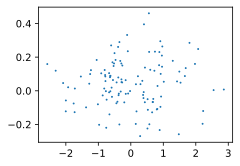

In [117]:
set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);

### 3.2.2 读取数据

在训练模型的时候，遍历数据集并不断读取 batch_size（批量大小）个随机样本的特征和标签

In [22]:
batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[-0.3434,  0.7105],
        [-2.1120, -0.8285],
        [ 0.3908, -1.5360],
        [ 0.1989,  0.8842],
        [ 0.1648, -0.5535],
        [ 0.1254, -0.9284],
        [ 1.0883,  1.2508],
        [ 0.5089,  0.6147],
        [-0.1253,  0.2231],
        [ 0.0873, -2.2244]]) tensor([ 1.0999,  2.8121, 10.1992,  1.5981,  6.4099,  7.5989,  2.1209,  3.1242,
         3.1870, 11.9519])


### 3.2.3 初始化模型参数

将权重初始化成均值为 0、标准差为 0.01 的正态随机数，偏差则初始化成 0

In [23]:
# 初始化权重和偏差
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.zeros(1, dtype=torch.float32)

# 设置梯度迭代
w.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True) 

tensor([0.], requires_grad=True)

### 3.2.4 定义模型

使用 $mm$ 函数做矩阵乘法来定义模型

In [27]:
def linreg(X, w, b):
    return torch.mm(X, w) + b

### 3.2.5 定义损失函数

使用平方损失来定义线性回归的损失函数

In [25]:
def squared_loss(y_hat, y):
    # 注意这里返回的是向量, 另外, pytorch里的MSELoss并没有除以 2
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

### 3.2.6 定义优化算法

以下的 sgd 函数实现小批量随机梯度下降算法。它通过不断迭代模型参数来优化损失函数

In [26]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size # 注意这里更改param时用的param.data

### 3.2.7 训练模型

In [29]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):  # 训练模型一共需要 num_epochs 个迭代周期
    # 在每一个迭代周期中，会使用训练数据集中所有样本一次（假设样本数能够被批量大小整除）。
    # X 和 y 分别是小批量样本的特征和标签
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()  # l 是有关小批量 X 和 y 的损失
        l.backward()                     # 小批量的损失对模型参数求梯度
        sgd([w, b], lr, batch_size)      # 使用小批量随机梯度下降迭代模型参数

        # 不要忘了梯度清零b
        w.grad.data.zero_()
        b.grad.data.zero_()
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))
    
print(true_w, '\n', w)
print(true_b, '\n', b)

epoch 1, loss 0.000047
epoch 2, loss 0.000047
epoch 3, loss 0.000047
[2, -3.4] 
 tensor([[ 1.9996],
        [-3.3987]], requires_grad=True)
4.2 
 tensor([4.1992], requires_grad=True)


## 3.3 线性回归的简洁实现

### 3.3.1 生成数据集

In [35]:
num_inputs = 2
num_examples = 1000
true_w = [2, -3.4]
true_b = 4.2
features = torch.tensor(np.random.normal(0, 1, (num_examples, num_inputs)), dtype=torch.float)
labels = true_w[0] * features[:, 0] + true_w[1] * features[:, 1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

### 3.3.2 读取数据 (Datasets, DataLoader)

In [40]:
import torch.utils.data as Data

batch_size = 10
# 将训练数据的特征和标签组合
dataset = Data.TensorDataset(features, labels)
# 随机读取小批量
data_iter = Data.DataLoader(dataset, batch_size, shuffle=True)

for X, y in data_iter:
    print(X, y)
    break

tensor([[-0.4586,  0.7941],
        [-1.2299,  1.0965],
        [ 1.3116,  0.3602],
        [-0.2417, -0.0450],
        [-0.5698,  1.3171],
        [-0.4444,  0.0501],
        [-0.3339, -1.1759],
        [-0.1912, -0.3999],
        [ 1.3210,  0.2467],
        [ 1.4061,  0.8613]]) tensor([ 0.5735, -1.9844,  5.5981,  3.8645, -1.4266,  3.1314,  7.5291,  5.1760,
         5.9840,  4.0942])


### 3.3.3 定义模型 (nn.Module)

首先，导入torch.nn模块。该模块定义了大量神经网络的层。nn的核心数据结构是Module，它是一个抽象概念，既可以表示神经网络中的某个层（layer），也可以表示一个包含很多层的神经网络。
- 继承nn.Module，撰写自己的网络/层。
- 返回输出的前向传播（forward）方法。

下面先来看看如何用nn.Module实现一个线性回归模型。

In [43]:
class LinearNet(nn.Module):
    def __init__(self, n_feature):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(n_feature, 1)
    # forward 定义前向传播
    def forward(self, x):
        y = self.linear(x)
        return y

net = LinearNet(num_inputs)
print(net) # 使用print可以打印出网络的结构

LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)
Parameter containing:
tensor([[ 0.4602, -0.1744]], requires_grad=True)
Parameter containing:
tensor([0.2360], requires_grad=True)


还可以用 nn.Sequential 来更加方便地搭建网络，Sequential是一个有序的容器，网络层将按照在传入 Sequential 的顺序依次被添加到计算图中。

In [30]:
# 写法一
net = nn.Sequential(
    nn.Linear(num_inputs, 1)
    # 此处还可以传入其他层
    )

# 写法二
net = nn.Sequential()
net.add_module('linear', nn.Linear(num_inputs, 1))
# net.add_module ......

# 写法三
from collections import OrderedDict
net = nn.Sequential(OrderedDict([
          ('linear', nn.Linear(num_inputs, 1))
          # ......
        ]))

print(net)
print(net[0])

Sequential(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)
Linear(in_features=2, out_features=1, bias=True)


可以通过 net.parameters() 来查看模型所有的可学习参数，此函数将返回一个生成器

In [31]:
for param in net.parameters():
    print(param)

Parameter containing:
tensor([[-0.6669, -0.6362]], requires_grad=True)
Parameter containing:
tensor([0.3345], requires_grad=True)


### 3.3.4 初始化模型参数 (nn.init)

通过 init.normal_ 将权重参数每个元素初始化为随机采样于均值为 0、标准差为 0.01 的正态分布。偏差会初始化为零

In [36]:
from torch.nn import init

init.normal_(net.linear.weight, mean=0, std=0.01)
init.constant_(net.linear.bias, val=0)  # 也可以直接修改bias的data: net[0].bias.data.fill_(0)

Parameter containing:
tensor([0.], requires_grad=True)

### 3.3.5 定义损失函数 (nn)

nn 模块中提供了各种损失函数

In [37]:
loss = nn.MSELoss()

### 3.3.6 定义优化算法 (optim)

torch.optim 模块提供了很多常用的优化算法比如 SGD、Adam 和 RMSProp 等

In [38]:
import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.03)
print(optimizer)

SGD (
Parameter Group 0
    dampening: 0
    lr: 0.03
    momentum: 0
    nesterov: False
    weight_decay: 0
)


### 3.3.7 训练模型

通过调用 optim 实例的 step 函数来迭代模型参数

In [41]:
num_epochs = 3
for epoch in range(1, num_epochs + 1):
    for X, y in data_iter:
        output = net(X)
        l = loss(output, y.view(-1, 1))
        
        optimizer.zero_grad() # 梯度清零，等价于net.zero_grad()
        l.backward()
        optimizer.step()
        
    print('epoch %d, loss: %f' % (epoch, l.item()))

epoch 1, loss: 0.000418
epoch 2, loss: 0.000107
epoch 3, loss: 0.000121


In [50]:
dense = net.linear
print(true_w, dense.weight)
print(true_b, dense.bias)

[2, -3.4] Parameter containing:
tensor([[ 1.9990, -3.3996]], requires_grad=True)
4.2 Parameter containing:
tensor([4.1993], requires_grad=True)


### 小结

- 使用PyTorch可以更简洁地实现模型。
- torch.utils.data模块提供了有关数据处理的工具
- torch.nn模块定义了大量神经网络的层
- torch.nn.init模块定义了各种初始化方法
- torch.optim模块提供了很多常用的优化算法。

## 3.4 softmax回归

和线性回归不同，softmax回归的输出单元从一个变成了多个，且引入了 softmax 运算使输出更适合离散值的预测和训练

### 3.4.1 分类问题

虽然可以使用回归模型来进行建模，并将预测值就近定点化到离散值，以解决分类的问题，但这种连续值到离散值的转化通常会影响到分类质量，因此一般使用更加适合离散值输出的模型来解决分类问题。

### 3.4.2 softmax回归模型

和 线性回归的异同：

- 相同点： softmax回归跟线性回归一样将输入特征与权重做线性叠加
- 不同点： softmax回归的输出值个数等于标签里的类别数

softmax 回归模型的表示

$ o_1 =	x_1w_{11} + x_2w_{21} + x_3w_{31} + x_4w_{41} + b_1 $

$ o_2 = x_1w_{12} + x_2w_{22} + x_3w_{32} + x_4w_{42} + b_2 $

$ o_3 = x_1w_{13} + x_2w_{23} + x_3w_{33} + x_4w_{43} + b_3 $

![jupyter](http://tangshusen.me/Dive-into-DL-PyTorch/img/chapter03/3.4_softmaxreg.svg)

使用线性回归输出层的输出做分类有两个问题

- 由于输出层的输出值的范围不确定，很难直观上判断这些值的意义
- 由于真实标签是离散值，这些离散值与不确定范围的输出值之间的误差难以衡量

softmax 运算符解决了以上两个问题。它将输出值变换成**值为正且和为1** 的概率分布：

$$ \hat y_1, \hat y_2, \hat y_ 3 = softmax(o1,o2,o3) $$ 

其中

$$ \hat y_1 = \frac{exp(o_1)}{\sum_{i=1}^{3}exp(o_i)}, \hat y_2 = \frac{exp(o_2)}{\sum_{i=1}^{3}exp(o_i)}, \hat y_3 = \frac{exp(o_3)}{\sum_{i=1}^{3}exp(o_i)} $$ 

### 3.4.3 单样本分类的矢量计算表达式

假设softmax回归的权重和偏差参数分别为

$ W = \begin{bmatrix}
w_{11} & w_{12} & w_{13} \\
w_{21} & w_{22} & w_{23} \\
w_{31} & w_{32} & w_{33}
\end{bmatrix} $,
$ C = \begin{vmatrix}
b_1 & b_2 & b_3
\end{vmatrix} $

2个像素的图像样本ii的特征为

$ x^{(i)} = \begin{bmatrix}
x_1^{(i)} & x_2^{(i)} & x_3^{(i)} & x_4^{(i)}
\end{bmatrix} $

输出层的输出为

$ o^{(i)} = \begin{bmatrix}
o_1^{(i)} & o_2^{(i)} & o_3^{(i)} & o_4^{(i)}
\end{bmatrix} $

预测为狗、猫或鸡的概率分布为

$ \hat y^{(i)} = \begin{bmatrix}
\hat y_1^{(i)} & \hat y_2^{(i)} & \hat y_3^{(i)} & \hat y_4^{(i)}
\end{bmatrix} $

softmax 回归对样本 $i$ 分类的矢量计算表达式为

$ o^{(i)} =x^{(i)}W + b $
 
$ y^{(i)} = softmax(o^{(i)}) $

### 3.4.4 小批量样本分类的矢量计算表达式

给定一个小批量样本，其批量大小为 $n$，输入个数（特征数）为 $d$，输出个数（类别数）为 $q$。设批量特征为 $X∈R^{n×d}$。假设softmax回归的权重和偏差参数分别为 $W∈R^{d×q}$ 和 $b∈R^{1×q}$。softmax回归的矢量计算表达式为
 

$ O = XW + b $

$ \hat Y = softmax(O) $

其中的加法运算使用了广播机制，$O,\hat Y∈R^{n×q}$ 且这两个矩阵的第 $i$ 行分别为样本 $i$ 的输出 $o^{(i)}$ 和概率分布 $yˆ{(i)}$ 。

### 3.4.5 交叉熵损失函数

对于样 $i$，构造向量 $y^{(i)}∈R^q$，使其第 $y^{(i)}$（样本 $i$ 类别的离散数值）个元素为1，其余为0。这样训练目标可以设为使预测概率分布 $\hat y^{(i)}$ 尽可能接近真实的标签概率分布 $y^{(i)}$ 。

交叉熵函数:

$$ H(y_{(i)}, \hat y_{(i)})=−\sum_{j=1}^{q}y_j^{(i)}log\hat y_j^{(i)} $$

在上式中，向量 $y_{(i)}$ 中只有第 $y_{(i)}$ 个元素$y^{(i)}_{y^{(i)}}$ 为1，其余全为0，于是 $H(y_{(i)}, \hat y_{(i)})=−log\hat y^{(i)}_{y^{(i)}}$
 。也就是说，交叉熵只关心对正确类别的预测概率，只要其值足够大，就可以确保分类结果正确


训练数据集的样本数为$n$ , 交叉熵损失函数:

$$ ℓ(Θ)= \frac{1}{n}\sum_{i=1}^{n}H(y_{(i)}, \hat y_{(i)}) $$

最小化交叉熵损失函数等价于最大化训练数据集所有标签类别的联合预测概率

### 3.4.6 模型预测及评价

使用准确率（accuracy）来评价模型的表现。准确率等于正确预测数量与总预测数量之比

### 小结

- softmax回归适用于分类问题。它使用softmax运算输出类别的概率分布。
- softmax回归是一个单层神经网络，输出个数等于分类问题中的类别个数。
- 交叉熵适合衡量两个概率分布的差异。

## 3.5 图像分类数据集（Fashion-MNIST）

torchvision包，是服务于 PyTorch 深度学习框架的，主要用来构建计算机视觉模型, 主要由以下几部分构成：

- torchvision.datasets: 一些加载数据的函数及常用的数据集接口；
- torchvision.models: 包含常用的模型结构（含预训练模型），例如AlexNet、VGG、ResNet等；
- torchvision.transforms: 常用的图片变换，例如裁剪、旋转等；
- torchvision.utils: 其他的一些有用的方法。

### 3.5.1 获取数据集

In [43]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time

下面，我们通过 torchvision.datasets 来下载这个数据集

- download: 第一次调用时会自动从网上获取数据。
- train: 指定获取训练数据集或测试数据集（testing data set）。测试数据集也叫测试集（testing set），只用来评价模型的表现，并不用来训练模型。
- transform = transforms.ToTensor()使所有数据转换为Tensor，如果不进行转换则返回的是PIL图片。transforms.ToTensor()将尺寸为 (H x W x C) 且数据位于[0, 255]的PIL图片或者数据类型为np.uint8的NumPy数组转换为尺寸为(C x H x W)且数据类型为torch.float32且位于[0.0, 1.0]的Tensor。

In [44]:
mnist_train = torchvision.datasets.FashionMNIST(root='./Datasets/FashionMNIST', train=True,  download=True, transform=transforms.ToTensor())
mnist_test  = torchvision.datasets.FashionMNIST(root='./Datasets/FashionMNIST', train=False, download=True, transform=transforms.ToTensor())
print(type(mnist_train))
print(len(mnist_train), len(mnist_test))

<class 'torchvision.datasets.mnist.FashionMNIST'>
60000 10000


访问一个样本

In [45]:
feature, label = mnist_train[0]
print(feature.shape, label)  # Channel x Height x Width

torch.Size([1, 28, 28]) 9


看一下训练数据集中前10个样本的图像内容和文本标签

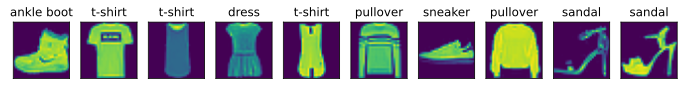

In [46]:
X, y = [], []
for i in range(10):
    X.append(mnist_train[i][0])
    y.append(mnist_train[i][1])
show_fashion_mnist(X, get_fashion_mnist_labels(y))

### 3.5.2 读取小批量

数据读取经常是训练的性能瓶颈，特别当模型较简单或者计算硬件性能较高时。PyTorch的DataLoader中一个很方便的功能是允许使用多进程来加速数据读取。这里我们通过参数num_workers来设置4个进程读取数据

In [48]:
import sys
batch_size = 256
if sys.platform.startswith('win'):
    num_workers = 0  # 0表示不用额外的进程来加速读取数据
else:
    num_workers = 4
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=num_workers)

查看读取一遍训练数据需要的时间

In [49]:
start = time.time()
for X, y in train_iter:
    continue
print('%.2f sec' % (time.time() - start))

1.30 sec


## 3.6 softmax回归的从零开始实现

### 3.6.1 获取和读取数据

In [50]:
batch_size = 256
if sys.platform.startswith('win'):
    num_workers = 0  # 0表示不用额外的进程来加速读取数据
else:
    num_workers = 4
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=num_workers)

### 3.6.2 初始化模型参数

In [51]:
num_inputs = 784
num_outputs = 10

W = torch.tensor(np.random.normal(0, 0.01, (num_inputs, num_outputs)), dtype=torch.float)
b = torch.zeros(num_outputs, dtype=torch.float)

In [52]:
W.requires_grad_(requires_grad=True)
b.requires_grad_(requires_grad=True) 

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

### 3.6.3 实现softmax运算

In [53]:
def softmax(X):
    X_exp = X.exp()
    partition = X_exp.sum(dim=1, keepdim=True)
    return X_exp / partition  # 这里应用了广播机制

In [54]:
X = torch.rand((2, 5))
X_prob = softmax(X)
print(X_prob, X_prob.sum(dim=1))

tensor([[0.1587, 0.1702, 0.1812, 0.1689, 0.3211],
        [0.1542, 0.2510, 0.2171, 0.1986, 0.1791]]) tensor([1.0000, 1.0000])


### 3.6.4 定义模型

In [55]:
def net(X):
    return softmax(torch.mm(X.view((-1, num_inputs)), W) + b)

### 3.6.5 定义损失函数

In [56]:
def cross_entropy(y_hat, y):
    return - torch.log(y_hat.gather(1, y.view(-1, 1)))

### 3.6.6 计算分类准确率

In [57]:
def accuracy(y_hat, y):
    return (y_hat.argmax(dim=1) == y).float().mean().item()

In [58]:
# 本函数已保存在d2lzh_pytorch包中方便以后使用。该函数将被逐步改进：它的完整实现将在“图像增广”一节中描述
def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for X, y in data_iter:
        acc_sum += (net(X).argmax(dim=1) == y).float().sum().item()
        n += y.shape[0]
    return acc_sum / n

In [59]:
print(evaluate_accuracy(test_iter, net))

0.1421


### 3.6.7 训练模型

In [60]:
num_epochs, lr = 10, 0.1

# 本函数已保存在d2lzh包中方便以后使用
def train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size,
              params=None, lr=None, optimizer=None):
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
        for X, y in train_iter:
            y_hat = net(X)
            l = loss(y_hat, y).sum()

            # 梯度清零
            if optimizer is not None:
                optimizer.zero_grad()
            elif params is not None and params[0].grad is not None:
                for param in params:
                    param.grad.data.zero_()

            l.backward()
            if optimizer is None:
                sgd(params, lr, batch_size)
            else:
                optimizer.step()  # “softmax回归的简洁实现”一节将用到


            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(dim=1) == y).sum().item()
            n += y.shape[0]
        test_acc = evaluate_accuracy(test_iter, net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f'
              % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc))

train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, batch_size, [W, b], lr)

epoch 1, loss 0.7873, train acc 0.746, test acc 0.790
epoch 2, loss 0.5699, train acc 0.814, test acc 0.811
epoch 3, loss 0.5252, train acc 0.825, test acc 0.818
epoch 4, loss 0.5018, train acc 0.832, test acc 0.825
epoch 5, loss 0.4852, train acc 0.837, test acc 0.827
epoch 6, loss 0.4752, train acc 0.840, test acc 0.826
epoch 7, loss 0.4658, train acc 0.842, test acc 0.832
epoch 8, loss 0.4570, train acc 0.845, test acc 0.833
epoch 9, loss 0.4518, train acc 0.846, test acc 0.835
epoch 10, loss 0.4474, train acc 0.849, test acc 0.831


### 3.6.8 预测

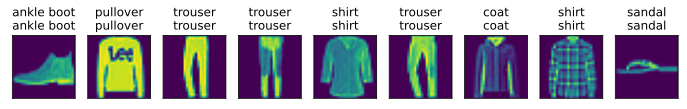

In [61]:
X, y = iter(test_iter).next()

true_labels = get_fashion_mnist_labels(y.numpy())
pred_labels = get_fashion_mnist_labels(net(X).argmax(dim=1).numpy())
titles = [true + '\n' + pred for true, pred in zip(true_labels, pred_labels)]

show_fashion_mnist(X[0:9], titles[0:9])

## 3.7 softmax回归的简洁实现

### 3.7.1 获取和读取数据

In [62]:
batch_size = 256
if sys.platform.startswith('win'):
    num_workers = 0  # 0表示不用额外的进程来加速读取数据
else:
    num_workers = 4
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=num_workers)

### 3.7.2 定义和初始化模型

In [63]:
num_inputs = 784
num_outputs = 10

class LinearNet(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)
    def forward(self, x): # x shape: (batch, 1, 28, 28)
        y = self.linear(x.view(x.shape[0], -1))
        return y

net = LinearNet(num_inputs, num_outputs)

In [64]:
class FlattenLayer(nn.Module):
    def __init__(self):
        super(FlattenLayer, self).__init__()
    def forward(self, x): # x shape: (batch, *, *, ...)
        return x.view(x.shape[0], -1)

In [65]:
from collections import OrderedDict

net = nn.Sequential(
    # FlattenLayer(),
    # nn.Linear(num_inputs, num_outputs)
    OrderedDict([
        ('flatten', FlattenLayer()),
        ('linear', nn.Linear(num_inputs, num_outputs))
    ])
)

In [66]:
init.normal_(net.linear.weight, mean=0, std=0.01)
init.constant_(net.linear.bias, val=0) 

Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

### 3.7.3 softmax和交叉熵损失函数

In [67]:
loss = nn.CrossEntropyLoss()

### 3.7.4 定义优化算法

In [68]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)

### 3.7.5 训练模型

In [69]:
num_epochs = 5
train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, None, None, optimizer)

epoch 1, loss 0.0031, train acc 0.749, test acc 0.780
epoch 2, loss 0.0022, train acc 0.814, test acc 0.782
epoch 3, loss 0.0021, train acc 0.826, test acc 0.811
epoch 4, loss 0.0020, train acc 0.834, test acc 0.820
epoch 5, loss 0.0019, train acc 0.836, test acc 0.819


### 小结

- PyTorch 提供的函数往往具有更好的数值稳定性。
- 可以使用 PyTorch 更简洁地实现 softmax 回归。

## 3.8 多层感知机 (MLP)

### 3.8.1 隐藏层

多层感知机在单层神经网络的基础上引入了一到多个隐藏层（hidden layer）。隐藏层位于输入层和输出层之间

![jupyter](http://tangshusen.me/Dive-into-DL-PyTorch/img/chapter03/3.8_mlp.svg)

如图所示的多层感知机中，输入和输出个数分别为 4 和 3，中间的隐藏层中包含了 5 个隐藏单元（hidden unit）。由于输入层不涉及计算，图中的多层感知机的层数为 2。如图可见，隐藏层中的神经元和输入层中各个输入完全连接，输出层中的神经元和隐藏层中的各个神经元也完全连接。因此，多层感知机中的隐藏层和输出层都是全连接层。

给定一个小批量样本 $X∈R^{n×d}$，其批量大小为 $n$，输入个数为 $d$。假设多层感知机只有一个隐藏层，其中隐藏单元个数为 $h$。记隐藏层的输出（也称为隐藏层变量或隐藏变量）为 $H$，有 $H∈R^{n×h}$。因为隐藏层和输出层均是全连接层，可以设隐藏层的权重参数和偏差参数分别为 $W_h∈R^{d×h}$ 和 $b_h∈R{1×h}$，输出层的权重和偏差参数分别为 $W_o∈R^{h×q}$ 和 $b_o∈R^{1×q}$。

其输出 $O∈R^{n×q}$ 的计算为

$ H = XW_h + b_h $

$ O = HW_o +b_o $

将以上两个式子联立起来

$ O=( XW_h + b_h )W_o + b_o =XW_hW_o + b_hW_o + b_o $

从联立后的式子可以看出，虽然神经网络引入了隐藏层，却依然等价于一个单层神经网络

### 3.8.2 激活函数

上述问题的根源在于全连接层只是对数据做仿射变换（affine transformation），而多个仿射变换的叠加仍然是一个仿射变换。解决问题的一个方法是引入非线性变换，例如对隐藏变量使用按元素运算的非线性函数进行变换，然后再作为下一个全连接层的输入。这个非线性函数被称为激活函数（activation function）。

#### 3.8.2.1 ReLU函数

$$ ReLU(x)=max(x,0) $$

In [70]:
%matplotlib inline
import torch
import numpy as np
import matplotlib.pylab as plt

def xyplot(x_vals, y_vals, name):
    set_figsize(figsize=(5, 2.5))
    plt.plot(x_vals.detach().numpy(), y_vals.detach().numpy())
    plt.xlabel('x')
    plt.ylabel(name + '(x)')

ReLU 函数

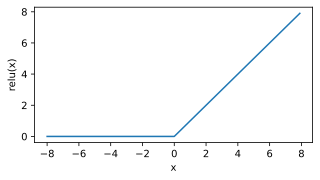

In [71]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = x.relu()
xyplot(x, y, 'relu')

ReLU 函数导数

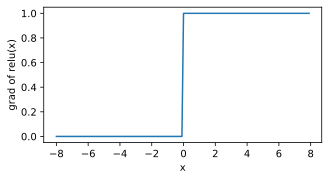

In [72]:
y.sum().backward()
xyplot(x, x.grad, 'grad of relu')

#### 3.8.2.2 sigmoid函数

sigmoid函数可以将元素的值变换到0和1之间

$$ sigmoid(x)= \frac{1}{1+exp(−x)} $$

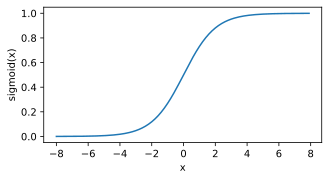

In [73]:
y = x.sigmoid()
xyplot(x, y, 'sigmoid')

sigmoid函数的导数。当输入为0时，sigmoid函数的导数达到最大值0.25；当输入越偏离0时，sigmoid函数的导数越接近0

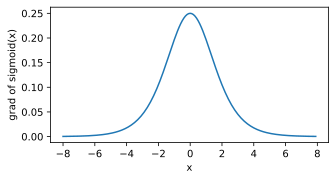

In [74]:
x.grad.zero_()
y.sum().backward()
xyplot(x, x.grad, 'grad of sigmoid')

#### 3.8.2.3 tanh函数

tanh（双曲正切）函数可以将元素的值变换到-1和1之间

$$ tanh(x)= \frac{1-exp(−2x)}{1+exp(−2x)} $$

tanh函数。当输入接近0时，tanh函数接近线性变换

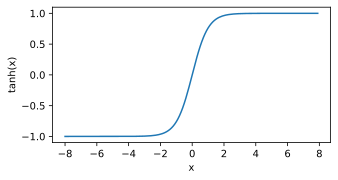

In [75]:
y = x.tanh()
xyplot(x, y, 'tanh')

tanh函数的导数。当输入为0时，tanh函数的导数达到最大值1；当输入越偏离0时，tanh函数的导数越接近0

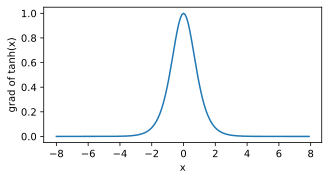

In [76]:
x.grad.zero_()
y.sum().backward()
xyplot(x, x.grad, 'grad of tanh')

### 3.8.3 多层感知机

多层感知机就是含有至少一个隐藏层的由全连接层组成的神经网络，且每个隐藏层的输出通过激活函数进行变换

$$ H = ϕ(XW_h + b_h) $$
$$ O = HW_o + b_o $$

其中 ϕ 表示激活函数。
- 在分类问题中，可以对输出 O 做softmax运算，并使用 softmax 回归中的**交叉熵损失函数**。 
- 在回归问题中，将输出层的输出个数设为1，并将输出 O 直接提供给线性回归中使用的**平方损失函数**。

### 小结

- 多层感知机在输出层与输入层之间加入了一个或多个全连接隐藏层，并通过激活函数对隐藏层输出进行变换。
- 常用的激活函数包括 ReLU 函数、sigmoid 函数和 tanh 函数。

## 3.9 多层感知机的从零开始实现

### 3.9.1 获取和读取数据

In [77]:
batch_size = 256
if sys.platform.startswith('win'):
    num_workers = 0  # 0表示不用额外的进程来加速读取数据
else:
    num_workers = 4
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=num_workers)

### 3.9.2 定义模型参数

In [78]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = torch.tensor(np.random.normal(0, 0.01, (num_inputs, num_hiddens)), dtype=torch.float)
b1 = torch.zeros(num_hiddens, dtype=torch.float)
W2 = torch.tensor(np.random.normal(0, 0.01, (num_hiddens, num_outputs)), dtype=torch.float)
b2 = torch.zeros(num_outputs, dtype=torch.float)

params = [W1, b1, W2, b2]
for param in params:
    param.requires_grad_(requires_grad=True)

### 3.9.3 定义激活函数

In [79]:
def relu(X):
    return torch.max(input=X, other=torch.tensor(0.0))

### 3.9.4 定义模型

In [80]:
def net(X):
    X = X.view((-1, num_inputs))
    H = relu(torch.matmul(X, W1) + b1)
    return torch.matmul(H, W2) + b2

### 3.9.5 定义损失函数

In [81]:
loss = torch.nn.CrossEntropyLoss()

### 3.9.6 训练模型

In [82]:
num_epochs, lr = 5, 100.0
train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, params, lr)

epoch 1, loss 0.0031, train acc 0.709, test acc 0.803
epoch 2, loss 0.0019, train acc 0.824, test acc 0.801
epoch 3, loss 0.0017, train acc 0.845, test acc 0.845
epoch 4, loss 0.0015, train acc 0.856, test acc 0.806
epoch 5, loss 0.0015, train acc 0.864, test acc 0.842


## 3.10 多层感知机的简洁实现

### 3.10.1 定义模型

In [83]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

net = nn.Sequential(
        FlattenLayer(),
        nn.Linear(num_inputs, num_hiddens),
        nn.ReLU(),
        nn.Linear(num_hiddens, num_outputs), 
        )

for params in net.parameters():
    init.normal_(params, mean=0, std=0.01)

### 3.10.2 读取数据并训练模型

In [85]:
batch_size = 256
if sys.platform.startswith('win'):
    num_workers = 0  # 0表示不用额外的进程来加速读取数据
else:
    num_workers = 4
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=num_workers)


loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)

num_epochs = 5
train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, None, None, optimizer)

epoch 1, loss 0.0014, train acc 0.869, test acc 0.853
epoch 2, loss 0.0013, train acc 0.875, test acc 0.836
epoch 3, loss 0.0013, train acc 0.879, test acc 0.863
epoch 4, loss 0.0012, train acc 0.883, test acc 0.854
epoch 5, loss 0.0012, train acc 0.887, test acc 0.860


## 3.11 模型选择、欠拟合和过拟合

当模型在训练数据集上更准确时，它在测试数据集上却不一定更准确。这是为什么呢？

### 3.11.1 训练误差和泛化误差

- 训练误差指模型在训练数据集上表现出的误差
- 泛化误差指模型在任意一个测试数据样本上表现出的误差的期望，并常常通过测试数据集上的误差来近似

由于无法从训练误差估计泛化误差，一味地降低训练误差并不意味着泛化误差一定会降低。
机器学习模型应关注降低泛化误差。

### 3.11.2 模型选择

在机器学习中，通常需要评估若干候选模型的表现并从中选择模型, 这一过程称为模型选择（model selection）

#### 3.11.2.1 验证数据集

从严格意义上讲，测试集只能在所有超参数和模型参数选定后使用一次。不可以使用测试数据选择模型，如调参。由于无法从训练误差估计泛化误差，因此也不应只依赖训练数据选择模型。鉴于此，我们可以预留一部分在训练数据集和测试数据集以外的数据来进行模型选择。这部分数据被称为验证数据集，简称验证集（validation set）。

#### 3.11.2.2 K折交叉验证

在 $K$ 折交叉验证中，把原始训练数据集分割成 $K$ 个不重合的子数据集，然后做 $K$ 次模型训练和验证。每一次，使用一个子数据集验证模型，并使用其他$K−1$ 个子数据集来训练模型。在这 $K$ 次训练和验证中，每次用来验证模型的子数据集都不同。最后，我们对这 $K$ 次训练误差和验证误差分别求平均。

#### 3.11.3 欠拟合和过拟合

- 模型无法得到较低的训练误差，我们将这一现象称作欠拟合
- 模型的训练误差远小于它在测试数据集上的误差，我们称该现象为过拟合（overfitting）

虽然有很多因素可能导致这两种拟合问题，在这里重点讨论两个因素：模型复杂度和训练数据集大小。

##### 3.11.3.1 模型复杂度

![jupyter](http://tangshusen.me/Dive-into-DL-PyTorch/img/chapter03/3.11_capacity_vs_error.svg)

给定训练数据集，如果模型的复杂度过低，很容易出现欠拟合；如果模型复杂度过高，很容易出现过拟合。应对欠拟合和过拟合的一个办法是针对数据集选择合适复杂度的模型

##### 3.11.3.2 训练数据集大小

影响欠拟合和过拟合的另一个重要因素是训练数据集的大小。

- 训练数据集中样本数过少，特别是比模型参数数量（按元素计）更少时，更容易发生过拟合
- 泛化误差不会随训练数据集里样本数量增加而增大

因此，在计算资源允许的范围之内，通常希望训练数据集大一些，特别是在模型复杂度较高时，例如层数较多的深度学习模型。

### 3.11.4 多项式函数拟合实验

#### 3.11.4.1 生成数据集

在训练数据集和测试数据集中，给定样本特征 $x$，我们使用如下的三阶多项式函数来生成该样本的标签：

$y = 1.2x − 3.4x^2 + 5.6x^3 + 5 + ϵ$

In [88]:
n_train, n_test, true_w, true_b = 100, 100, [1.2, -3.4, 5.6], 5
features = torch.randn((n_train + n_test, 1))
poly_features = torch.cat((features, torch.pow(features, 2), torch.pow(features, 3)), 1) 
labels = (true_w[0] * poly_features[:, 0] + true_w[1] * poly_features[:, 1]
          + true_w[2] * poly_features[:, 2] + true_b)
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)

#### 3.11.4.2 定义、训练和测试模型

In [89]:
# 本函数已保存在d2lzh_pytorch包中方便以后使用
def semilogy(x_vals, y_vals, x_label, y_label, x2_vals=None, y2_vals=None,
             legend=None, figsize=(3.5, 2.5)):
    set_figsize(figsize)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.semilogy(x_vals, y_vals)
    if x2_vals and y2_vals:
        plt.semilogy(x2_vals, y2_vals, linestyle=':')
        plt.legend(legend)

In [90]:
num_epochs, loss = 100, torch.nn.MSELoss()

def fit_and_plot(train_features, test_features, train_labels, test_labels):
    net = torch.nn.Linear(train_features.shape[-1], 1)
    # 通过Linear文档可知，pytorch已经将参数初始化了，所以我们这里就不手动初始化了

    batch_size = min(10, train_labels.shape[0])    
    dataset = torch.utils.data.TensorDataset(train_features, train_labels)
    train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)

    optimizer = torch.optim.SGD(net.parameters(), lr=0.01)
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y.view(-1, 1))
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
        train_labels = train_labels.view(-1, 1)
        test_labels = test_labels.view(-1, 1)
        train_ls.append(loss(net(train_features), train_labels).item())
        test_ls.append(loss(net(test_features), test_labels).item())
    print('final epoch: train loss', train_ls[-1], 'test loss', test_ls[-1])
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
             range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('weight:', net.weight.data,
          '\nbias:', net.bias.data)

#### 3.11.4.3 三阶多项式函数拟合（正常）

final epoch: train loss 0.00011411884770495817 test loss 8.361836080439389e-05
weight: tensor([[ 1.1972, -3.4001,  5.6005]]) 
bias: tensor([4.9996])


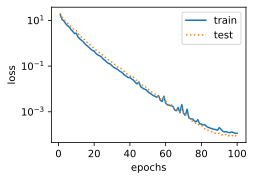

In [91]:
fit_and_plot(poly_features[:n_train, :], poly_features[n_train:, :], 
            labels[:n_train], labels[n_train:])

#### 3.11.4.4 线性函数拟合（欠拟合）

final epoch: train loss 300.6304931640625 test loss 249.74127197265625
weight: tensor([[21.0766]]) 
bias: tensor([1.4638])


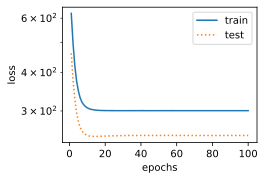

In [92]:
fit_and_plot(features[:n_train, :], features[n_train:, :], labels[:n_train],
             labels[n_train:])

#### 3.11.4.5 训练样本不足（过拟合）

final epoch: train loss 0.021580345928668976 test loss 70.5188217163086
weight: tensor([[ 1.6564, -2.8004,  3.8706]]) 
bias: tensor([-1.3281])


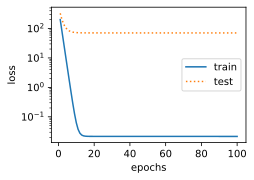

In [93]:
fit_and_plot(poly_features[0:2, :], poly_features[n_train:, :], labels[0:2],
             labels[n_train:])

### 小结

- 由于无法从训练误差估计泛化误差，一味地降低训练误差并不意味着泛化误差一定会降低。机器学习模型应关注降低泛化误差。
- 可以使用验证数据集来进行模型选择。
- 欠拟合指模型无法得到较低的训练误差，过拟合指模型的训练误差远小于它在测试数据集上的误差。
- 应选择复杂度合适的模型并避免使用过少的训练样本。

## 3.12 权重衰减

应对过拟合问题的常用方法：权重衰减（weight decay）

### 3.12.1 方法

权重衰减等价于 $L_2$ 范数正则化（regularization）。正则化通过为模型损失函数添加惩罚项使学出的模型参数值较小，是应对过拟合的常用手段

**$L_2$ 范数正则化**

$L_2$ 范数正则化在模型原损失函数基础上添加 $L_2$ 范数惩罚项，从而得到训练所需要最小化的函数。$L_2$ 范数惩罚项指的是模型权重参数每个元素的平方和与一个正的常数的乘积

$$ ℓ(w_1, w_2, b) = \frac{1}{n} \sum_{i=1}^{n} \frac{1}{2} (x_1^{(i)}w_1 + x_2^{(i)}w_2 + b − y^{(i)})^2$$

带有 $L_2$ 范数惩罚项的新损失函数为


$$ ℓ(w_1, w_2, b )+ \frac{λ}{2n} \lVert w \rVert^2 $$

其中超参数 $λ>0$。当权重参数均为 0 时，惩罚项最小。当 $λ$ 较大时，惩罚项在损失函数中的比重较大，这通常会使学到的权重参数的元素较接近 0。当λλ设为0时，惩罚项完全不起作用。

$$ w_1 ← (1 − \frac{ηλ}{∣B∣})w_1 − \frac{η}{∣B∣} \sum_{i∈B} x_1^{(i)}(x_1^{(i)}w_1 + x_2^{(i)}w_2 + b − y^{(i)}) $$
$$ w_2 ← (1 − \frac{ηλ}{∣B∣})w_2 − \frac{η}{∣B∣} \sum_{i∈B} x_2^{(i)}(x_1^{(i)}w_1 + x_2^{(i)}w_2 + b − y^{(i)}) $$

可见，$L_2$ 范数正则化令权重 $w_1$ 和 $w_2$ 先自乘小于 1 的数，再减去不含惩罚项的梯度。因此，$L_2$ 范数正则化又叫权重衰减。权重衰减通过惩罚绝对值较大的模型参数为需要学习的模型增加了限制，这可能对过拟合有效

### 3.12.2 高维线性回归实验

In [94]:
%matplotlib inline
import torch
import torch.nn as nn
import numpy as np

n_train, n_test, num_inputs = 20, 100, 200
true_w, true_b = torch.ones(num_inputs, 1) * 0.01, 0.05

features = torch.randn((n_train + n_test, num_inputs))
labels = torch.matmul(features, true_w) + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), dtype=torch.float)
train_features, test_features = features[:n_train, :], features[n_train:, :]
train_labels, test_labels = labels[:n_train], labels[n_train:]

### 3.12.3 从零开始实现

#### 3.12.3.1 初始化模型参数

In [95]:
def init_params():
    w = torch.randn((num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

#### 3.12.3.2 定义L2 范数惩罚项

In [96]:
def l2_penalty(w):
    return (w**2).sum() / 2

#### 3.12.3.3 定义训练和测试

In [97]:
batch_size, num_epochs, lr = 1, 100, 0.003
net, loss = linreg, squared_loss

dataset = torch.utils.data.TensorDataset(train_features, train_labels)
train_iter = torch.utils.data.DataLoader(dataset, batch_size, shuffle=True)

def fit_and_plot(lambd):
    w, b = init_params()
    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            # 添加了L2范数惩罚项
            l = loss(net(X, w, b), y) + lambd * l2_penalty(w)
            l = l.sum()

            if w.grad is not None:
                w.grad.data.zero_()
                b.grad.data.zero_()
            l.backward()
            sgd([w, b], lr, batch_size)
        train_ls.append(loss(net(train_features, w, b), train_labels).mean().item())
        test_ls.append(loss(net(test_features, w, b), test_labels).mean().item())
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
                 range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('L2 norm of w:', w.norm().item())

#### 3.12.3.4 观察过拟合

L2 norm of w: 13.932330131530762


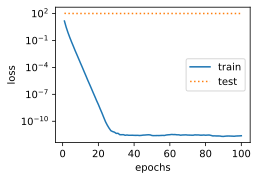

In [98]:
fit_and_plot(lambd=0)

#### 3.12.3.5 使用权重衰减

L2 norm of w: 0.04541231691837311


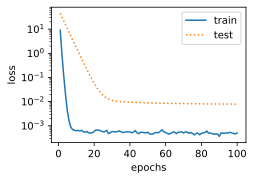

In [99]:
fit_and_plot(lambd=3)

### 3.12.4 简洁实现

直接在构造优化器实例时通过weight_decay参数来指定权重衰减超参数

In [102]:
def fit_and_plot_pytorch(wd):
    # 对权重参数衰减。权重名称一般是以weight结尾
    net = nn.Linear(num_inputs, 1)
    nn.init.normal_(net.weight, mean=0, std=1)
    nn.init.normal_(net.bias, mean=0, std=1)
    optimizer_w = torch.optim.SGD(params=[net.weight], lr=lr, weight_decay=wd) # 对权重参数衰减
    optimizer_b = torch.optim.SGD(params=[net.bias], lr=lr)  # 不对偏差参数衰减

    train_ls, test_ls = [], []
    for _ in range(num_epochs):
        for X, y in train_iter:
            l = loss(net(X), y).mean()
            optimizer_w.zero_grad()
            optimizer_b.zero_grad()

            l.backward()

            # 对两个optimizer实例分别调用step函数，从而分别更新权重和偏差
            optimizer_w.step()
            optimizer_b.step()
        train_ls.append(loss(net(train_features), train_labels).mean().item())
        test_ls.append(loss(net(test_features), test_labels).mean().item())
    semilogy(range(1, num_epochs + 1), train_ls, 'epochs', 'loss',
                 range(1, num_epochs + 1), test_ls, ['train', 'test'])
    print('L2 norm of w:', net.weight.data.norm().item())

L2 norm of w: 12.996126174926758


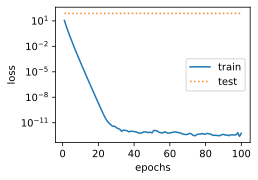

In [103]:
fit_and_plot_pytorch(0)

L2 norm of w: 0.058625493198633194


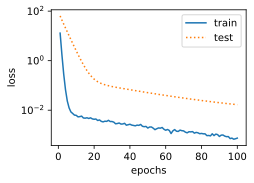

In [104]:
fit_and_plot_pytorch(3)

### 小结

- 正则化通过为模型损失函数添加惩罚项使学出的模型参数值较小，是应对过拟合的常用手段。
- 权重衰减等价于 $L_2$ 范数正则化，通常会使学到的权重参数的元素较接近0。
- 权重衰减可以通过优化器中的weight_decay超参数来指定。
- 可以定义多个优化器实例对不同的模型参数使用不同的迭代方法。

## 3.13 丢弃法

除了前一节介绍的权重衰减以外，深度学习模型常常使用丢弃法（dropout） 来应对过拟合问题

### 3.13.1 方法

对该隐藏层使用丢弃法，该层的隐藏单元将有一定概率被丢弃, 但丢弃法不改变其输入的期望值

如下图所示，其中 $h_2$ 和 $h_5$ 被清零。这时输出值的计算不再依赖 $h_2$ 和 $h_5$ ，在反向传播时，与这两个隐藏单元相关的权重的梯度均为0。由于在训练中隐藏层神经元的丢弃是随机的，即 $h_1$,…,$h_5$ 都有可能被清零，输出层的计算无法过度依赖 $h_1$,…,$h_5$ 中的任一个，从而在训练模型时起到正则化的作用，并可以用来应对过拟合。

 ![jupyter](http://tangshusen.me/Dive-into-DL-PyTorch/img/chapter03/3.13_dropout.svg)
 
 在测试模型时，我们为了拿到更加确定性的结果，一般不使用丢弃法。

### 3.13.2 从零开始实现

In [105]:
%matplotlib inline
import torch
import torch.nn as nn
import numpy as np

def dropout(X, drop_prob):
    X = X.float()
    assert 0 <= drop_prob <= 1
    keep_prob = 1 - drop_prob
    # 这种情况下把全部元素都丢弃
    if keep_prob == 0:
        return torch.zeros_like(X)
    mask = (torch.rand(X.shape) < keep_prob).float()

    return mask * X / keep_prob

In [106]:
X = torch.arange(16).view(2, 8)
dropout(X, 0)

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14., 15.]])

#### 3.13.2.1 定义模型参数

In [107]:
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256

W1 = torch.tensor(np.random.normal(0, 0.01, size=(num_inputs, num_hiddens1)), dtype=torch.float, requires_grad=True)
b1 = torch.zeros(num_hiddens1, requires_grad=True)
W2 = torch.tensor(np.random.normal(0, 0.01, size=(num_hiddens1, num_hiddens2)), dtype=torch.float, requires_grad=True)
b2 = torch.zeros(num_hiddens2, requires_grad=True)
W3 = torch.tensor(np.random.normal(0, 0.01, size=(num_hiddens2, num_outputs)), dtype=torch.float, requires_grad=True)
b3 = torch.zeros(num_outputs, requires_grad=True)

params = [W1, b1, W2, b2, W3, b3]

#### 3.13.2.2 定义模型

In [108]:
drop_prob1, drop_prob2 = 0.2, 0.5

def net(X, is_training=True):
    X = X.view(-1, num_inputs)
    H1 = (torch.matmul(X, W1) + b1).relu()
    if is_training:  # 只在训练模型时使用丢弃法
        H1 = dropout(H1, drop_prob1)  # 在第一层全连接后添加丢弃层
    H2 = (torch.matmul(H1, W2) + b2).relu()
    if is_training:
        H2 = dropout(H2, drop_prob2)  # 在第二层全连接后添加丢弃层
    return torch.matmul(H2, W3) + b3

In [109]:
# 本函数已保存在d2lzh_pytorch
def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for X, y in data_iter:
        if isinstance(net, torch.nn.Module):
            net.eval() # 评估模式, 这会关闭dropout
            acc_sum += (net(X).argmax(dim=1) == y).float().sum().item()
            net.train() # 改回训练模式
        else: # 自定义的模型
            if('is_training' in net.__code__.co_varnames): # 如果有is_training这个参数
                # 将is_training设置成False
                acc_sum += (net(X, is_training=False).argmax(dim=1) == y).float().sum().item() 
            else:
                acc_sum += (net(X).argmax(dim=1) == y).float().sum().item() 
        n += y.shape[0]
    return acc_sum / n

#### 3.13.2.3 训练和测试模型

In [110]:
num_epochs, lr, batch_size = 5, 100.0, 256
loss = torch.nn.CrossEntropyLoss()

if sys.platform.startswith('win'):
    num_workers = 0  # 0表示不用额外的进程来加速读取数据
else:
    num_workers = 4
train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=num_workers)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False, num_workers=num_workers)

train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, params, lr)

epoch 1, loss 0.0044, train acc 0.563, test acc 0.713
epoch 2, loss 0.0023, train acc 0.783, test acc 0.753
epoch 3, loss 0.0019, train acc 0.821, test acc 0.806
epoch 4, loss 0.0017, train acc 0.840, test acc 0.847
epoch 5, loss 0.0016, train acc 0.849, test acc 0.849


### 3.13.3 简洁实现

在PyTorch中，我们只需要在全连接层后添加 Dropout 层并指定丢弃概率。在训练模型时，Dropout 层将以指定的丢弃概率随机丢弃上一层的输出元素；在测试模型时（即 model.eval() 后），Dropout 层并不发挥作用。

In [112]:
net = nn.Sequential(
        FlattenLayer(),
        nn.Linear(num_inputs, num_hiddens1),
        nn.ReLU(),
        nn.Dropout(drop_prob1),
        nn.Linear(num_hiddens1, num_hiddens2), 
        nn.ReLU(),
        nn.Dropout(drop_prob2),
        nn.Linear(num_hiddens2, 10)
        )

for param in net.parameters():
    nn.init.normal_(param, mean=0, std=0.01)

In [113]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, None, None, optimizer)

epoch 1, loss 0.0046, train acc 0.547, test acc 0.707
epoch 2, loss 0.0024, train acc 0.777, test acc 0.771
epoch 3, loss 0.0019, train acc 0.818, test acc 0.789
epoch 4, loss 0.0018, train acc 0.837, test acc 0.810
epoch 5, loss 0.0016, train acc 0.847, test acc 0.810


### 小结

- 我们可以通过使用丢弃法应对过拟合。
- 丢弃法只在训练模型时使用。

## 3.14 正向传播、反向传播和计算图

- 正向传播（forward propagation）的计算，即对输入计算模型输出，
- 通过autograd模块来调用系统自动生成的backward函数计算梯度。
- 基于反向传播（back-propagation）算法的自动求梯度极大简化了深度学习模型训练算法的实现

### 3.14.1 正向传播

正向传播是指对神经网络沿着从输入层到输出层的顺序，依次计算并存储模型的中间变量（包括输出）

### 3.14.2 正向传播的计算图

 ![jupyter](http://tangshusen.me/Dive-into-DL-PyTorch/img/chapter03/3.14_forward.svg)

### 3.14.3 反向传播

反向传播指的是计算神经网络参数梯度的方法。总的来说，反向传播依据微积分中的链式法则，沿着从输出层到输入层的顺序，依次计算并存储目标函数有关神经网络各层的中间变量以及参数的梯度

### 3.14.4 训练深度学习模型

在模型参数初始化完成后，我们交替地进行正向传播和反向传播，并根据反向传播计算的梯度迭代模型参数。

### 小结

- 正向传播沿着从输入层到输出层的顺序，依次计算并存储神经网络的中间变量。
- 反向传播沿着从输出层到输入层的顺序，依次计算并存储神经网络中间变量和参数的梯度。
- 在训练深度学习模型时，正向传播和反向传播相互依赖。

## 3.15 数值稳定性和模型初始化

深度模型有关数值稳定性的典型问题是衰减（vanishing）和爆炸（explosion）

### 3.15.1 衰减和爆炸

假设一个层数为 $L$ 的多层感知机的第 $l$ 层 $H^{(l)}$ 的权重参数为 $W^{(l)}$，输出层 $H^{(L)}$ 的权重参数为 $W^{(L)}$。为了便于讨论，不考虑偏差参数，且设所有隐藏层的激活函数为恒等映射（identity mapping）$ϕ(x)=x$ 。给定输入 $X$，多层感知机的第 $l$ 层的输出 $H^{(l)} = XW^{(1)}W^{(2)}…W^{(l)}$ 。此时，如果层数 $l$ 较大，$H^{(l)}$ 的计算可能会出现衰减或爆炸。举个例子，假设输入和所有层的权重参数都是标量，如权重参数为 0.2 和 5，多层感知机的第 30 层输出为输入 $X$ 分别与 $0.2^{30}≈1×10^{−21}$ （衰减）和 $5^{30} ≈ 9×10^{20}$ （爆炸）的乘积。类似地，当层数较多时，梯度的计算也更容易出现衰减或爆炸。

### 3.15.2 随机初始化模型参数

通常将神经网络的模型参数，特别是权重参数，进行随机初始化。

#### 3.15.2.1 PyTorch的默认随机初始化

使用 torch.nn.init.normal_() 使模型 net 的权重参数采用正态分布的随机初始化方式

#### 3.15.2.2 Xavier随机初始化

假设某全连接层的输入个数为 $a$，输出个数为 $b$，Xavier 随机初始化将使该层中权重参数的每个元素都随机采样于均匀分布

$$ U(−\sqrt \frac{6}{a + b}, \sqrt \frac{6}{a + b})$$

它的设计主要考虑到，模型参数初始化后，每层输出的方差不该受该层输入个数影响，且每层梯度的方差也不该受该层输出个数影响。

### 小结

- 深度模型有关数值稳定性的典型问题是衰减和爆炸。当神经网络的层数较多时，模型的数值稳定性容易变差。
- 我们通常需要随机初始化神经网络的模型参数，如权重参数。